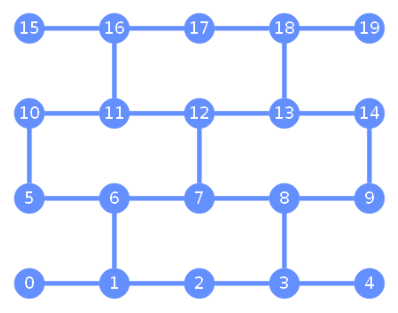

In [1]:
%load_ext autoreload
%autoreload 2

from qiskit_ibm_runtime.fake_provider import FakeBoeblingenV2
from qiskit.visualization import plot_gate_map

backend = FakeBoeblingenV2()

plot_gate_map(backend)

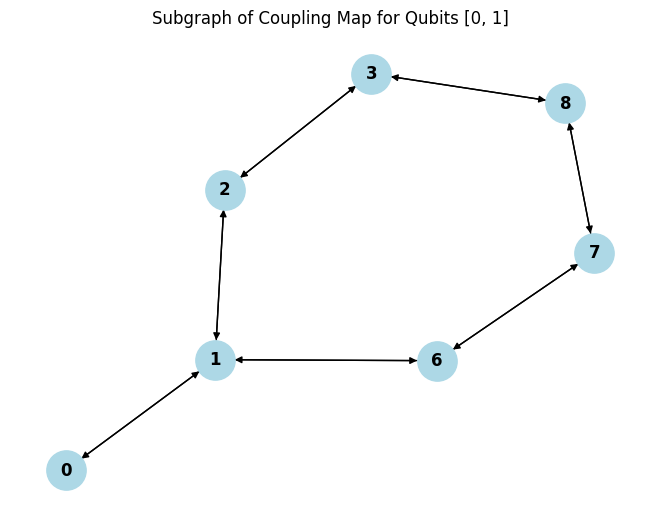

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

rx_graph = backend.coupling_map.graph

# Subgraph als rustworkx-Graph erstellen
sub_nodes = [0, 1,2,3,6,7,8]
subgraph_rx = rx_graph.subgraph(sub_nodes)

# Konvertieren nach networkx
subgraph_nx = nx.DiGraph()
for i in range(len(sub_nodes)):
    subgraph_nx.add_node(sub_nodes[i])

# rustworkx verwendet numerische Knoten-IDs, daher brauchen wir Mapping:
for i, u in enumerate(sub_nodes):
    for j, v in enumerate(sub_nodes):
        if i != j and subgraph_rx.has_edge(i, j):
            subgraph_nx.add_edge(sub_nodes[i], sub_nodes[j])

# Zeichnen
pos = nx.spring_layout(subgraph_nx)
nx.draw(subgraph_nx, pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
plt.title("Subgraph of Coupling Map for Qubits [0, 1]")
plt.show()


In [3]:

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.providers.fake_provider import GenericBackendV2
from matplotlib import pyplot as plt
import sys
import numpy as np
from qiskit.quantum_info import Pauli
from qiskit_aer.noise import NoiseModel, pauli_error

sys.path.append("../../pauli_lindblad_per/")
from tomography.experiment import SparsePauliTomographyExperiment as tomography

plt.style.use("ggplot")

In [4]:
inst_map = [0,1]
n = 2
qc = QuantumCircuit(n)
qc.cx(0,1)
print(qc.draw())

coupling_list = [(0, 1), (1, 0)]

errorops = [Pauli("XY")]
errorprobs = [0.1]

# Erzeuge PauliError und NoiseModel
twoqubit_error = pauli_error([(op, p) for op, p in zip(errorops, errorprobs)] + [(Pauli("II"), 1 - sum(errorprobs))])
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(twoqubit_error, ['cx'])

          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘


In [6]:
experiment = tomography(
    circuits = [qc], #list of circuits from which to get the layers requiring tomography
    inst_map = inst_map, #which physical qubits on the processor to map the qubits in the circuit
    backend = backend, #quantum backend
    used_qubits = [0,1]
    )

In [7]:
experiment.generate(
    samples = 100, #Number of samples to take from the fidelity pair measurements
    single_samples = 250, #samples to take from the pair-breaking measurements
    depths = [2,4,16,32,64] #values of 2n to make the pair measurements. Numbers must be even and non-zero
    )

shots = 1024
def executor(circuits):
    return backend.run(circuits, shots = shots, noise_model=noise_model).result().get_counts()

#run the experiment
experiment.run(executor)

noisedataframe = experiment.analyze()

c:\Users\kchar\OneDrive\Desktop\Uni\Hiwi_Orth\Qiskit\qiskit-venv\lib\site-packages\qiskit\compiler\transpiler.py:269: UserWarning: Providing `coupling_map` and/or `basis_gates` along with `backend` is not recommended, as this will invalidate the backend's gate durations and error rates.
  pm = generate_preset_pass_manager(
c:\Users\kchar\OneDrive\Desktop\Uni\Hiwi_Orth\Qiskit\qiskit-venv\lib\site-packages\qiskit\compiler\transpiler.py:269: UserWarning: Providing `coupling_map` and/or `basis_gates` along with `backend` is not recommended, as this will invalidate the backend's gate durations and error rates.
  pm = generate_preset_pass_manager(


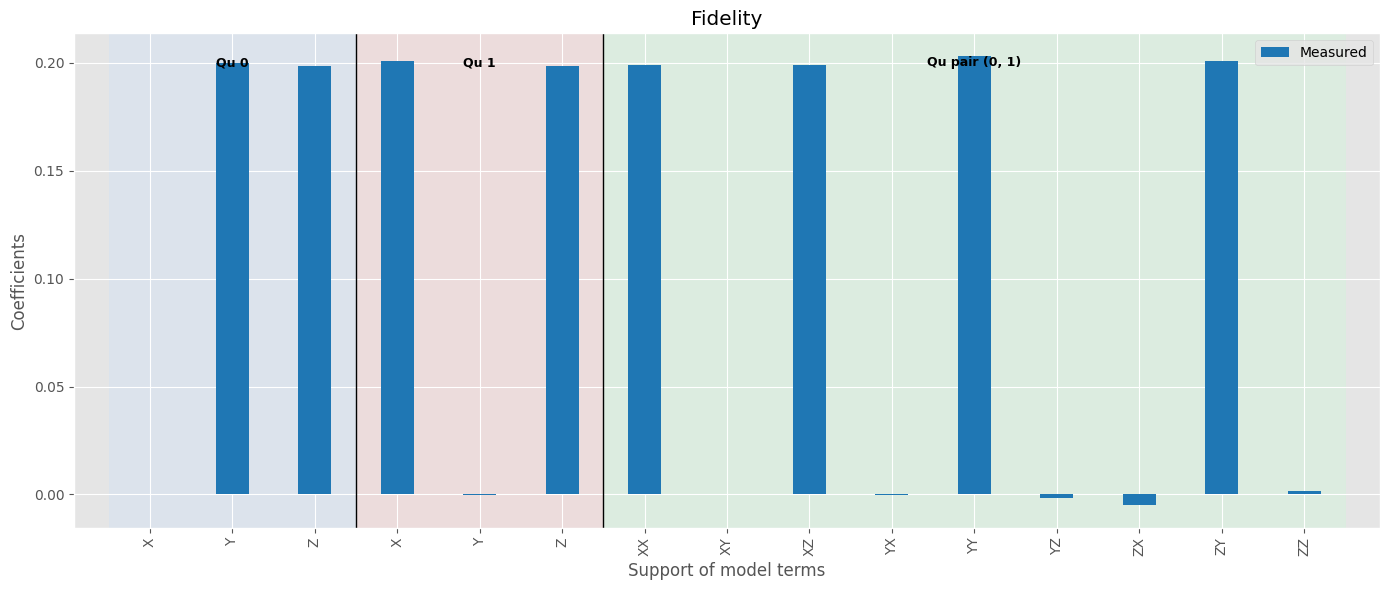

In [8]:
layer = experiment.analysis.get_layer_data(0)
layer.plot_infidelitites(plot_style = 2)

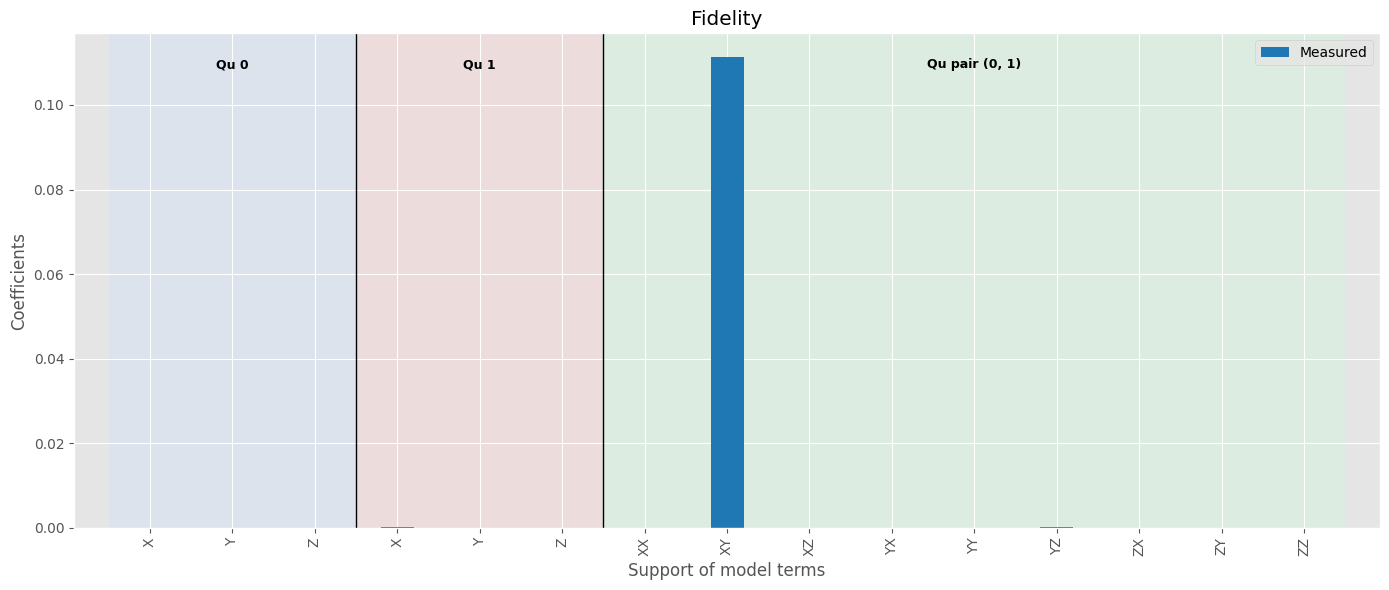

In [9]:
layer.plot_coeffs(plot_style = 2)

In [ ]:
"""    FakeAlgiers
    FakeAlmadenV2
    FakeArmonkV2
    FakeAthensV2
    FakeAuckland
    FakeBelemV2
    FakeBoeblingenV2
    FakeBogotaV2
    FakeBrisbane
    FakeBrooklynV2
    FakeBurlingtonV2
    FakeCairoV2
    FakeCambridgeV2
    FakeCasablancaV2
    FakeCusco
    FakeEssexV2
    FakeFez
    FakeGeneva
    FakeGuadalupeV2
    FakeHanoiV2
    FakeJakartaV2
    FakeJohannesburgV2
    FakeKawasaki
    FakeKolkataV2
    FakeKyiv
    FakeKyoto
    FakeLagosV2
    FakeLimaV2
    FakeFractionalBackend
    FakeLondonV2
    FakeManhattanV2
    FakeManilaV2
    FakeMarrakesh
    FakeMelbourneV2
    FakeMontrealV2
    FakeMumbaiV2
    FakeNairobiV2
    FakeOsaka
    FakeOslo
    FakeOurenseV2
    FakeParisV2
    FakePeekskill
    FakePerth
    FakePrague
    FakePoughkeepsieV2
    FakeQuebec
    FakeQuitoV2
    FakeRochesterV2
    FakeRomeV2
    .. FakeRueschlikonV2 # no v2 version
    FakeSantiagoV2
    FakeSherbrooke
    FakeSingaporeV2
    FakeSydneyV2
    .. FakeTenerifeV2 # no v2 version
    .. FakeTokyoV2 # no v2 version
    FakeTorino
    FakeTorontoV2
    FakeValenciaV2
    FakeVigoV2
    FakeWashingtonV2
    FakeYorktownV2"""